In [1]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

# set filepath to data source
filepath = "games.csv"


In [2]:
# load data into dataframe
games_df = pd.read_csv(filepath)
games_df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


In [3]:
# split opening_name into opening and variation
opening_variation_s = games_df["opening_name"].str.split(": ", n=1, expand = True)
games_df["opening"] = opening_variation_s[0]
games_df["variation"] = opening_variation_s[1]

# cleanup opening so similar names correlate properly 
# (eg. "Queens Pawn" and "Queens Pawn Game")

# map for splitting the opening_varient into (opening, varient)
opening_map = {}
# collection for names already tested
openings = []
for opening in games_df["opening"].value_counts().index:
  # skip already tested opening names
  if ~(opening in openings):
    # loop on the short list of tested names
    for op in openings:
      # ignore if they are the same (shouldn't happen)
      if opening == op:
        continue
      # if one is a substring of the other
      # then make a new mapping {longname : (shortname, varient)}
      elif (op.startswith(opening)):
        opening_map[op] = (opening, op[len(opening):])
        opening_map[opening] = (opening, "")
      elif (opening.startswith(op)):
        opening_map[opening] = (op, opening[len(op):])
        opening_map[op] = (op, "")
    openings.append(opening)

  # TODO
  # map update opening/variation on rows with that pattern
  


In [4]:

games_df["white_range"] = pd.cut(games_df["white_rating"], range(0, 3000, 200))
games_df["black_range"] = pd.cut(games_df["black_rating"], range(0, 3000, 200))

In [5]:
# High ELO_diff implies white should win;  low (negative) values imply black should win
games_df["elo_diff"] = games_df["white_rating"]-games_df["black_rating"]

In [6]:
# filter out bad data (resignations, unranked games)
# bad cases:  player rating missmatch, <10 turns resignation, no pieces lost resignation
# player missmatch


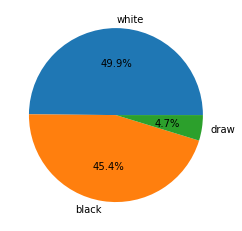

In [7]:
# get general summary data 

## overall wins for white/black
total_wins = games_df["winner"].value_counts()["white"]
total_losses = games_df["winner"].value_counts()["black"]
total_draws = games_df["winner"].value_counts()["draw"]
## counts of openings


## graphs to visualize these
plt.pie(x = games_df["winner"].value_counts(), labels = games_df["winner"].value_counts().index, autopct = "%.1f%%")
plt.show()

In [8]:
# grouping by opening
# find the win rates for each opening/varient
gby = games_df.groupby("opening_eco")

# graph these


In [9]:
# find the number of pieces taken by white/black each game

In [10]:
# grouping by opening, winner
# find out how many pieces the winner had taken 
#   vs the count of pieces the opp. had taken

# graph this seperately for white as winner and black as winner

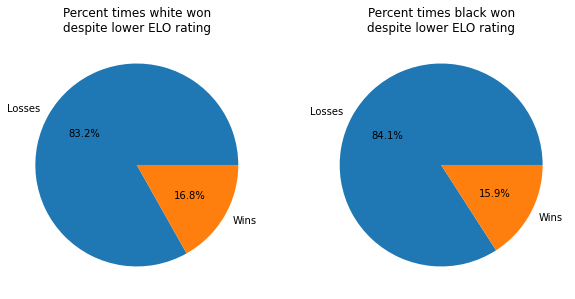

In [11]:
# graph % of times the lower rated player wins per opening per color
white_ud = (games_df["elo_diff"] < 0) & (games_df["winner"] == "white")
black_ud = (games_df["elo_diff"] > 0) & (games_df["winner"] == "black")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))

ax1.pie(x = white_ud.value_counts(), labels = white_ud.value_counts().index.map({True : "Wins", False : "Losses"}), autopct = "%.1f%%")
ax1.set_title("Percent times white won\ndespite lower ELO rating")

ax2.pie(x = black_ud.value_counts(), labels = black_ud.value_counts().index.map({True : "Wins", False : "Losses"}), autopct = "%.1f%%")
ax2.set_title("Percent times black won\ndespite lower ELO rating")

plt.show()

In [12]:
games_df[white_ud]["opening_eco"].value_counts()

A00    149
C00    136
B01    117
C41    116
C20    116
      ... 
C49      1
B74      1
E80      1
C14      1
E71      1
Name: opening_eco, Length: 259, dtype: int64

In [13]:
# repeat above work, but with the data binned by ranges of player ratings
